# Word2Vec with Gensim

- Create word2vec embeddings for the text8 dataset
- Output to a format compatible with torch neural networks

In [4]:
import torch
import gensim
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
corpus = api.load('text8')

In [6]:
try: 
    model = gensim.models.Word2Vec.load('word2vec-gensim-text8.model')
except:
    model = gensim.models.Word2Vec(corpus, vector_size=100, window=5, min_count=3, workers=4)

In [8]:
similar_words = model.wv.most_similar('king', topn=10)
print(similar_words)

[('prince', 0.733404278755188), ('queen', 0.7154676914215088), ('kings', 0.6979047656059265), ('vii', 0.6952149868011475), ('throne', 0.6949859261512756), ('emperor', 0.693122386932373), ('pope', 0.6728011965751648), ('pharaoh', 0.665357768535614), ('elector', 0.6629924774169922), ('aragon', 0.6546564698219299)]


In [9]:
result = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(result)

[('queen', 0.6596013307571411)]


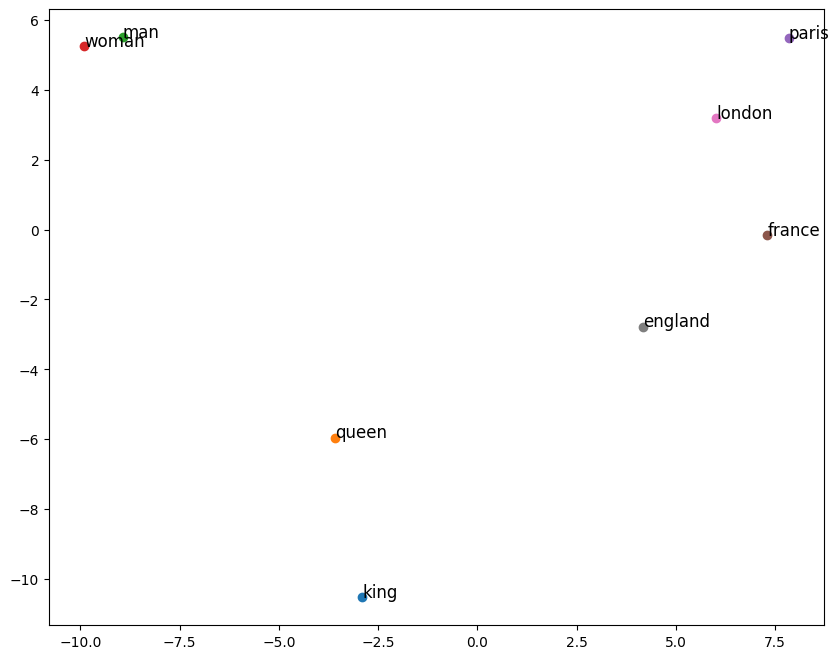

In [12]:
words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'london', 'england']
word_vectors = [model.wv[word] for word in words]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
word_vecs_2d = pca.fit_transform(word_vectors)

# Plotting the words in 2D space
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(word_vecs_2d[i][0], word_vecs_2d[i][1])
    plt.text(word_vecs_2d[i][0], word_vecs_2d[i][1], word, fontsize=12)

plt.show()


In [ ]:
model.save('word2vec-gensim-text8.model')